# Linear Regression analysis on Weather data in Szeged from 2006 to 2016



## Is there a relationship between Humidity and the apparent Temperature?


## Importing the dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset


In [4]:
df = pd.read_csv('/content/weatherHistory.csv')

In [5]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Data Cleaning / Data modification

In [6]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

Replacing every space with _ would benefit us and makes it easy to use further

In [7]:
df.columns = df.columns.str.replace(' ', '_')

In [8]:
df.head()

,Formatted_Date,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Loud_Cover,Pressure_(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [9]:
df.shape

(96453, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted_Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip_Type               95936 non-null  object 
 3   Temperature_(C)           96453 non-null  float64
 4   Apparent_Temperature_(C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind_Speed_(km/h)         96453 non-null  float64
 7   Wind_Bearing_(degrees)    96453 non-null  float64
 8   Visibility_(km)           96453 non-null  float64
 9   Loud_Cover                96453 non-null  float64
 10  Pressure_(millibars)      96453 non-null  float64
 11  Daily_Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [11]:
df.isnull().sum()

Formatted_Date                0
Summary                       0
Precip_Type                 517
Temperature_(C)               0
Apparent_Temperature_(C)      0
Humidity                      0
Wind_Speed_(km/h)             0
Wind_Bearing_(degrees)        0
Visibility_(km)               0
Loud_Cover                    0
Pressure_(millibars)          0
Daily_Summary                 0
dtype: int64

In [12]:
df['Loud_Cover'].unique()

array([0.])

The 'loud_cover' column is consistently filled with zeroes, hence we can remove it

In [13]:
df.drop('Loud_Cover', axis = 1, inplace = True)

In [14]:
total = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Precip_Type,517,0.536012
Formatted_Date,0,0.000000
Summary,0,0.000000
Temperature_(C),0,0.000000
Apparent_Temperature_(C),0,0.000000
Humidity,0,0.000000
Wind_Speed_(km/h),0,0.000000
Wind_Bearing_(degrees),0,0.000000
Visibility_(km),0,0.000000
Pressure_(millibars),0,0.000000


The Precip_Tyoe column has about 0.5% of missing data

In [15]:
(df['Precip_Type'].value_counts(dropna = False)/len(df)).to_frame()

,count
Precip_Type,
rain,0.883581
snow,0.111059
NaN,0.005360


Since, most of the times precipitaiton is happening by rain, we can replace all the NaN values with 'rain', or we can remove the 0.5% data all over.

In [16]:
df['Precip_Type'].fillna('rain', inplace = True)

In [17]:
(df['Precip_Type'].value_counts(dropna = False)/len(df)).to_frame()

,count
Precip_Type,
rain,0.888941
snow,0.111059


# Exploratory Data Analysis

In [18]:
df.describe().drop('count', axis = 0)

,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Pressure_(millibars)
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [19]:
df.describe(include = 'O')

,Formatted_Date,Summary,Precip_Type,Daily_Summary
count,96453,96453,96453,96453
unique,96429,27,2,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85741,20085


<Axes: xlabel='Summary'>

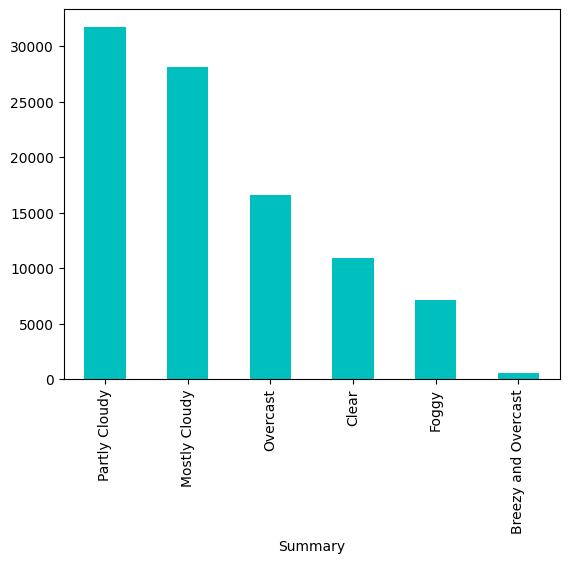

In [20]:
df.groupby('Summary').size().sort_values(ascending = False).head(6).plot(kind = 'bar', color = 'c')

Cloudy(mostly or partly) are the most freequent weather conditons, as per the table, we can see this in the plot above.

In [21]:
(df['Summary'].value_counts().head(2).sum()/len(df))*100

62.027101282489916

More than 60% of the days have, cloudy conditions

## Temperature

In [22]:
df['Temperature_(C)'].describe()

count    96453.000000
mean        11.932678
std          9.551546
min        -21.822222
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature_(C), dtype: float64

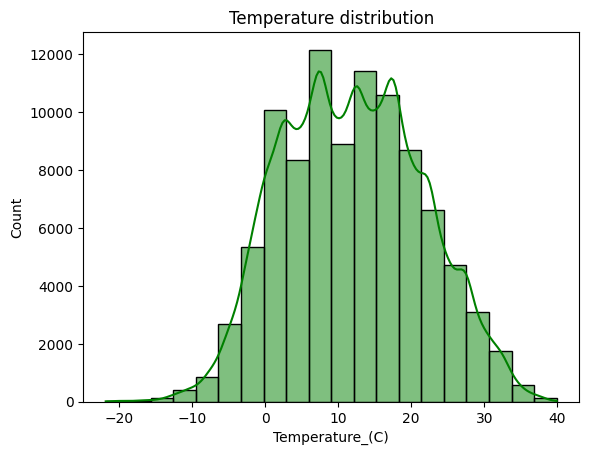

In [23]:
sns.histplot(x = df['Temperature_(C)'], kde = True, bins = 20, color = 'g')
plt.title('Temperature distribution')
plt.show()

In [24]:
df['Temperature_(C)'].mode()

0    7.222222
Name: Temperature_(C), dtype: float64

<Axes: xlabel='Formatted_Date'>

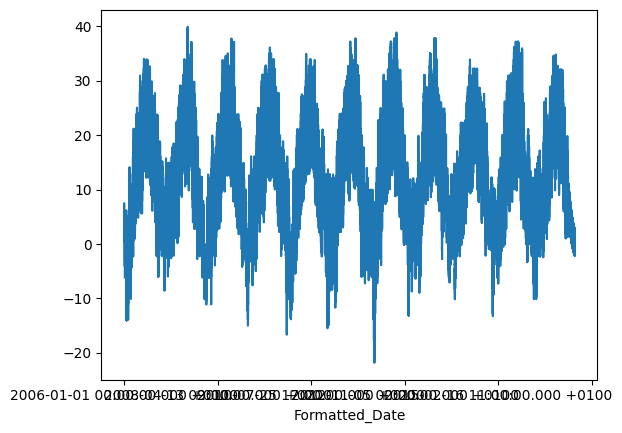

In [25]:
df.groupby('Formatted_Date')['Temperature_(C)'].mean().plot()

## Apparent Temperature

In [26]:
df['Apparent_Temperature_(C)'].describe()

count    96453.000000
mean        10.855029
std         10.696847
min        -27.716667
25%          2.311111
50%         12.000000
75%         18.838889
max         39.344444
Name: Apparent_Temperature_(C), dtype: float64

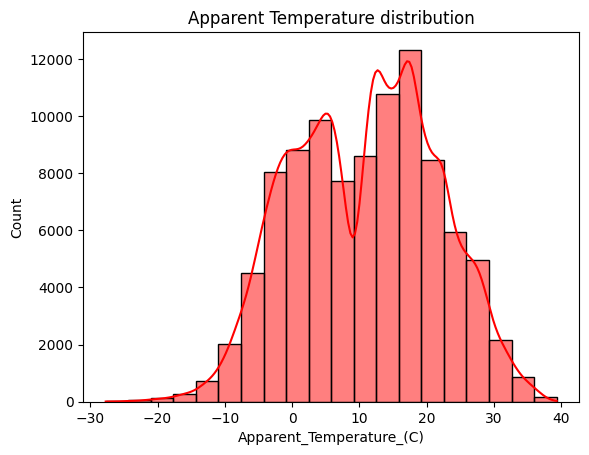

In [27]:
sns.histplot(x = df['Apparent_Temperature_(C)'], kde = True, bins = 20, color = 'r')
plt.title('Apparent Temperature distribution')
plt.show()

In [28]:
df['Apparent_Temperature_(C)'].mode()

0    12.777778
Name: Apparent_Temperature_(C), dtype: float64

<Axes: xlabel='Formatted_Date'>

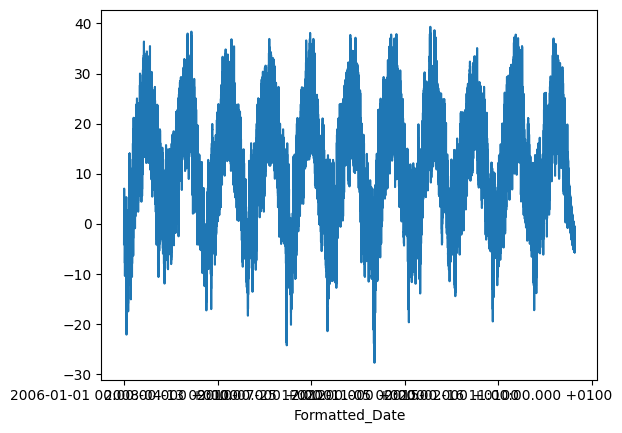

In [29]:
df.groupby('Formatted_Date')['Apparent_Temperature_(C)'].mean().plot()

## Comparing Temperature v/s Apparent Temperature

In [30]:
df[['Temperature_(C)', 'Apparent_Temperature_(C)']].describe().drop('count', axis = 0)

,Temperature_(C),Apparent_Temperature_(C)
mean,11.932678,10.855029
std,9.551546,10.696847
min,-21.822222,-27.716667
25%,4.688889,2.311111
50%,12.000000,12.000000
75%,18.838889,18.838889
max,39.905556,39.344444


<ipython-input-31-71a7cc6cae5d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['Temperature_(C)'], bins = 20, kde = True, hist = False, color = 'g')
<ipython-input-31-71a7cc6cae5d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['Apparent_Temperature_(C)'], bin

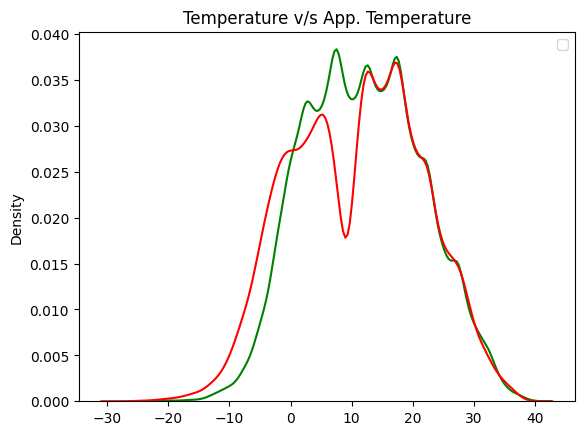

<Figure size 1200x600 with 0 Axes>

In [31]:
sns.distplot(x = df['Temperature_(C)'], bins = 20, kde = True, hist = False, color = 'g')
sns.distplot(x = df['Apparent_Temperature_(C)'], bins = 20, kde = True, hist = False, color = 'r')
plt.legend()
plt.title('Temperature v/s App. Temperature')
plt.figure(figsize = (12,6))
plt.show()

## Humidity

In [32]:
df['Humidity'].describe().to_frame().drop('count', axis = 0)

,Humidity
mean,0.734899
std,0.195473
min,0.000000
25%,0.600000
50%,0.780000
75%,0.890000
max,1.000000


<Axes: xlabel='Humidity', ylabel='Count'>

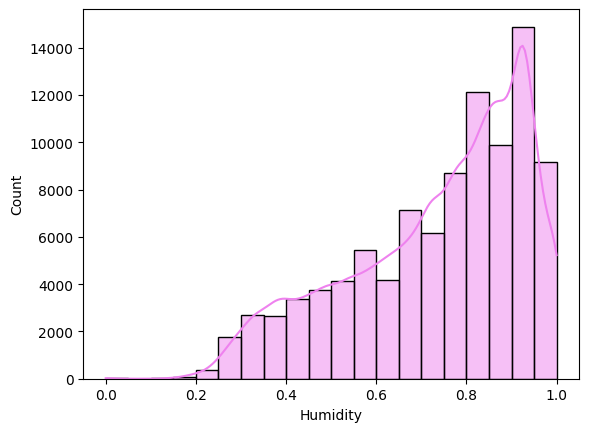

In [33]:
sns.histplot(df['Humidity'], kde = True, bins = 20, color = 'violet')

In [34]:
df[df['Humidity']> 0.8]

,Formatted_Date,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Pressure_(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96432,2016-09-09 03:00:00.000 +0200,Clear,rain,15.594444,15.594444,0.87,3.2844,41.0,15.4399,1014.52,Partly cloudy starting in the morning.
96433,2016-09-09 04:00:00.000 +0200,Clear,rain,15.011111,15.011111,0.93,3.2039,341.0,15.8263,1014.37,Partly cloudy starting in the morning.
96434,2016-09-09 05:00:00.000 +0200,Clear,rain,15.016667,15.016667,0.90,2.7048,359.0,14.9569,1014.55,Partly cloudy starting in the morning.
96435,2016-09-09 06:00:00.000 +0200,Clear,rain,13.872222,13.872222,0.93,4.7495,0.0,15.8263,1014.66,Partly cloudy starting in the morning.


In [35]:
len(df[df['Humidity']> 0.8]) * 100 / len(df)

45.88867116626751

Around 45% of the days having humidity more than 80%. The city is very humid.

## Wind speed

In [36]:
df['Wind_Speed_(km/h)'].describe().to_frame().drop('count', axis = 0)

,Wind_Speed_(km/h)
mean,10.810640
std,6.913571
min,0.000000
25%,5.828200
50%,9.965900
75%,14.135800
max,63.852600


<Axes: xlabel='Wind_Speed_(km/h)', ylabel='Count'>

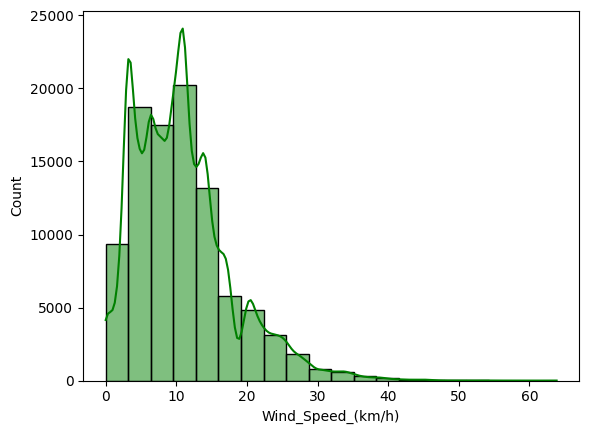

In [37]:
sns.histplot(df['Wind_Speed_(km/h)'], kde = True, bins = 20, color = 'green')

In [38]:
df[df['Wind_Speed_(km/h)'].between(5,15)]

,Formatted_Date,Summary,Precip_Type,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Pressure_(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [39]:
(len(df[df['Wind_Speed_(km/h)'].between(5,15)])/len(df))*100

56.150664053995214

With over 56% of days having wind speeds ranging between 5 to 15 Km/hr. Averaging around 10.8 Km/hr

## Most freequent weather conditions

<Axes: xlabel='Summary'>

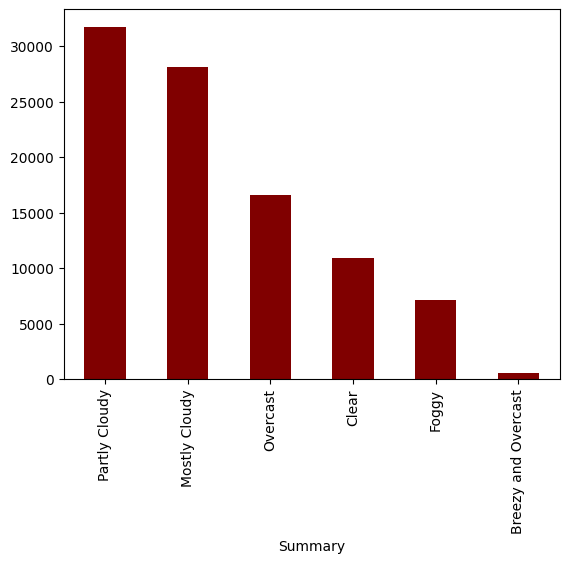

In [40]:
df.groupby('Summary').size().sort_values(ascending = False).head(6).plot(kind = 'bar', color = 'maroon')

Cloudy(mostly or partly) are the most freequent weather conditons, as per the table, we can see this in the plot above.

In [41]:
(df['Summary'].value_counts().head(2).sum()/len(df))*100

62.027101282489916

More than 60% of the days have, cloudy conditions

In [42]:
count = df.Summary.value_counts().head(5)
percent = df.Summary.value_counts().head(5)*100/len(df)
summary_data = pd.concat([count, percent], axis = 1, keys = ['Count', 'Percentage'])
summary_data

,Count,Percentage
Summary,,
Partly Cloudy,31733,32.899962
Mostly Cloudy,28094,29.127140
Overcast,16597,17.207345
Clear,10890,11.290473
Foggy,7148,7.410863


In [43]:
summary_data['Percentage'].sum()

97.93578219443668

We shall focus on the top 5 weather conditions which cover about 97% of the conditions.

## Selected data for the top 5 weather conditions

In [44]:
dist_df = df.loc[(df.Summary == 'Partly Cloudy') | (df.Summary == 'Mostly Cloudy') | (df.Summary == 'Overcast') | (df.Summary == 'Clear') | (df.Summary == 'Foggy') ,\
            ['Summary', 'Temperature_(C)', 'Apparent_Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)', 'Wind_Bearing_(degrees)', 'Visibility_(km)', 'Pressure_(millibars)']]

In [45]:
dist_df.head()

,Summary,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Pressure_(millibars)
0,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [46]:
dist_df.tail()

,Summary,Temperature_(C),Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility_(km),Pressure_(millibars)
96448,Partly Cloudy,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95
96452,Partly Cloudy,20.438889,20.438889,0.61,5.8765,39.0,15.5204,1016.16


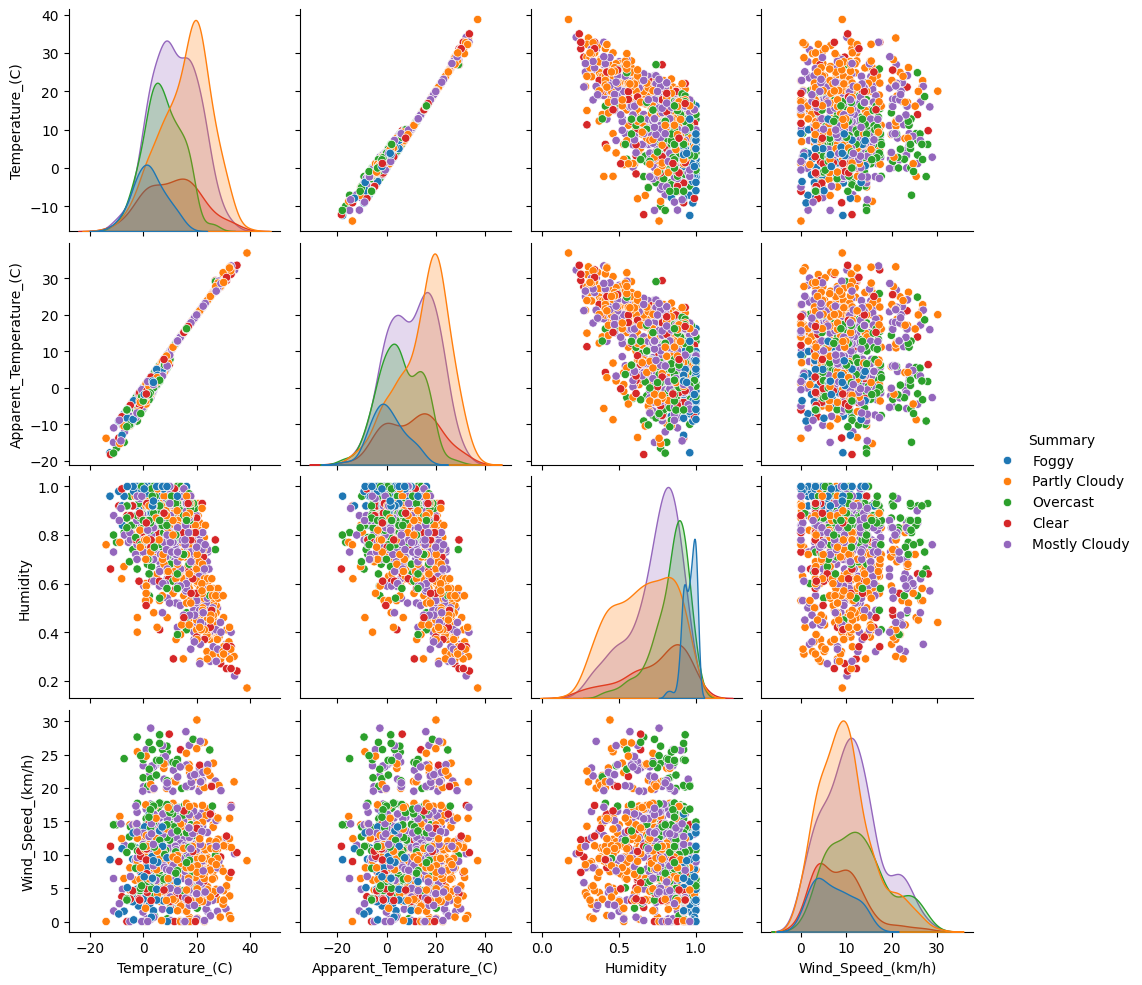

In [47]:
sample_size = 1000
sample = dist_df.sample(sample_size)
sns.pairplot(sample, vars = ['Temperature_(C)', 'Apparent_Temperature_(C)', 'Humidity', 'Wind_Speed_(km/h)'], hue = 'Summary')

In [48]:
group_df = df.groupby('Summary')[['Temperature_(C)', 'Apparent_Temperature_(C)','Humidity', 'Wind_Speed_(km/h)']].agg(['min', 'mean', 'max']).sort_values(by = 'Summary', ascending = False)

In [49]:
summary_counts = df['Summary'].value_counts()

In [50]:
group_df = group_df.loc[summary_counts.index]

In [51]:
group_df.head().style.set_properties(**{'border': '1px solid black'})

# Model Building

In [52]:
x = df['Humidity']
y = df['Apparent_Temperature_(C)']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder # Corrected import
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [64]:
reg = LinearRegression()

In [ ]:
# prompt: linear regression further

reg.fit(x_train.values.reshape(-1,1), y_train)
y_pred = reg.predict(x_test.values.reshape(-1,1))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2 Score:', r2)
print('MSE:', mse)
plt.figure(figsize = (10,6))
plt.scatter(x_test, y_test, color = 'r')
plt.plot(x_test, y_pred, color = 'b')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature')
plt.title('Linear Regression Model')
plt.show()


In [65]:
reg.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

In [66]:
y_pred = reg.predict(x_test.values.reshape(-1,1))

In [70]:
# accuracy = accuracy_score(y_test, y_pred)
R2_score = r2_score(y_test,y_pred)
mae = np.mean(np.absolute(y_test-y_pred))
mse = mean_squared_error(y_test,y_pred)

In [73]:
report = pd.DataFrame(data = {'MAE': [mae], 'MSE': [mse], 'R2 Score': [R2_score]})
report

,MAE,MSE,R2 Score
0,6.943815,73.2921,0.358653


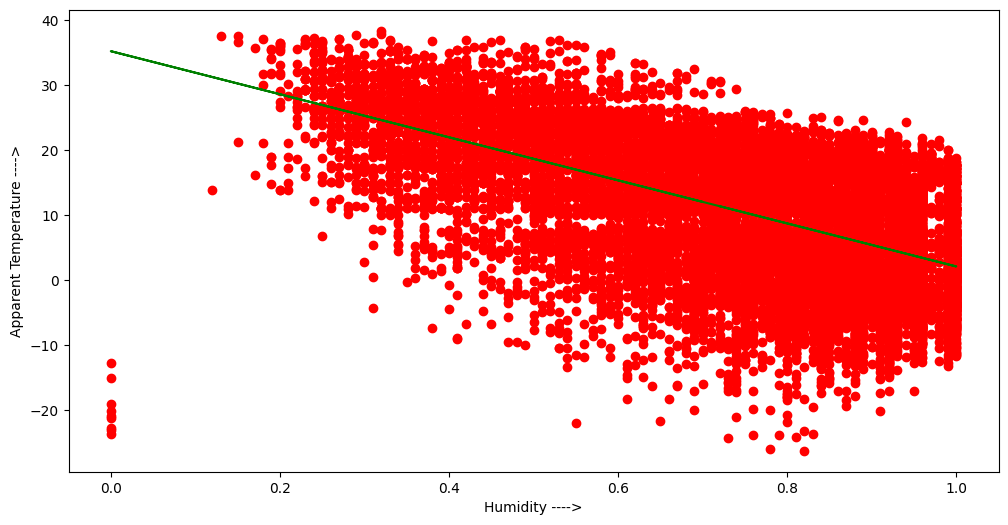

In [75]:
plt.figure(figsize = (12,6))
plt.scatter(x_test, y_test, color = 'r')
plt.plot(x_test, y_pred, color = 'g')
plt.xlabel('Humidity ---->')
plt.ylabel('Apparent Temperature ---->')
plt.show()